In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:
df = pd.read_csv("seattle_clean2.csv")
df.sample(10)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,SteamRatio,ElectricityRatio,NaturalGasRatio,SurfacePerBuilding,SurfacePerFloor,ParkingRatio,BuildingRatio
1144,24086,NonResidential,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,GREATER DUWAMISH,1991,10.0,1,230971,0,...,Compliant,405.05,1.75,0.0,0.733496,0.266504,23097.1,230971.000000,0.000000,1.000000
949,21894,NonResidential,Warehouse,821 WEARHOUSE,GREATER DUWAMISH,2007,1.0,1,35289,0,...,Compliant,23.90,0.68,0.0,0.560029,0.439971,35289.0,35289.000000,0.000000,1.000000
759,20605,NonResidential,Warehouse,VISKO BUILDING,DELRIDGE,1953,1.0,1,31521,0,...,Compliant,61.71,1.96,0.0,0.403180,0.596820,31521.0,31521.000000,0.000000,1.000000
415,592,NonResidential,Other,SEATTLE 1ST AVE GAR,GREATER DUWAMISH,2000,1.0,1,53040,41600,...,Compliant,49.90,0.94,0.0,0.540086,0.459914,11440.0,11440.000000,0.784314,0.215686
737,20440,NonResidential,Small- and Mid-Sized Office,SK Food Group,SOUTHWEST,1981,1.0,3,43387,0,...,Compliant,34.15,0.79,0.0,0.875623,0.124377,43387.0,14462.333333,0.000000,1.000000
1379,26150,NonResidential,K-12 School,Fairmount Park Elementary,SOUTHWEST,1964,1.0,2,39929,0,...,Error - Correct Default Data,47.18,1.18,0.0,0.587253,0.412747,39929.0,19964.500000,0.000000,1.000000
753,20541,NonResidential,Other,(ID20541) MYCON'S USED CARS,SOUTHEAST,1963,1.0,2,20047,0,...,Compliant,0.82,0.04,0.0,0.999997,0.000000,20047.0,10023.500000,0.000000,1.000000
1629,50101,NonResidential,University,Burke Museum,NORTHEAST,1962,1.0,1,68072,0,...,Compliant,22.17,0.33,0.0,1.000000,0.000000,68072.0,68072.000000,0.000000,1.000000
215,354,NonResidential,Large Office,Fourth & Madison,DOWNTOWN,2002,1.0,37,1052469,164420,...,Compliant,287.32,0.27,0.0,1.000000,0.000000,888049.0,24001.324324,0.156223,0.843777
301,452,NonResidential,Large Office,1144 Eastlake Building,LAKE UNION,2001,1.0,7,139200,44728,...,Compliant,30.27,0.22,0.0,1.000000,0.000000,94472.0,13496.000000,0.321322,0.678678


In [51]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'SteamRatio', 'ElectricityRatio',
       'NaturalGasRatio', 'SurfacePerBuilding', 'SurfacePerFloor',
       'ParkingRatio', 'BuildingRatio'],
      dtype='object')

In [52]:

import statsmodels.api as sm
import patsy

# Manually construct the formula using patsy.dmatrix
formula = "Q('SiteEUI(kBtu/sf)') ~ LargestPropertyUseType+PrimaryPropertyType+GHGEmissionsIntensity"
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Fit the OLS model
freq_multi = sm.OLS(y, X).fit()

# Print the summary of the regression
print(freq_multi.summary())


                              OLS Regression Results                             
Dep. Variable:     Q('SiteEUI(kBtu/sf)')   R-squared:                       0.740
Model:                               OLS   Adj. R-squared:                  0.729
Method:                    Least Squares   F-statistic:                     65.01
Date:                   Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                           11:21:40   Log-Likelihood:                -8314.0
No. Observations:                   1646   AIC:                         1.677e+04
Df Residuals:                       1576   BIC:                         1.715e+04
Df Model:                             69                                         
Covariance Type:               nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

####  Finding the Best Model

##### Data preparation

In [53]:
# import pandas as pd
# from sklearn.model_selection import train_test_split



# X = df.drop('SiteEUI(kBtu/sf)', axis = 1)
# y = df['SiteEUI(kBtu/sf)']


# # Diviser les données en ensembles d'entraînement, de validation et de test
# X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)






In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('seattle_clean2.csv')

# Séparer les caractéristiques (X) de la variable cible (y)
X = df.drop('SiteEUI(kBtu/sf)', axis=1)
y = df['SiteEUI(kBtu/sf)']

# Effectuer l'encodage one-hot automatiquement sur toutes les colonnes catégoriques
X = pd.get_dummies(X)

# Diviser les données en ensembles d'entraînement, de validation et de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Effectuer la validation croisée avec 5 folds (plis)
scores = cross_val_score(model, X, y, cv=5)

print("Scores de validation croisée :", scores)
print("Score moyen :", scores.mean())

model.fit(x_train, y_train)
predictions = model.predict(x_test)



Scores de validation croisée : [ 0.89448682  0.93585909  0.98595787  0.9870217  -0.28828577]
Score moyen : 0.7030079413495758


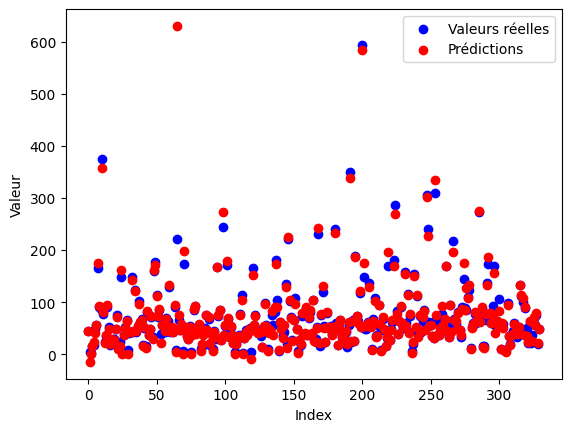

In [55]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs réelles')

# Tracer les prédictions
plt.scatter(range(len(predictions)), predictions, color='red', label='Prédictions')

# Ajouter des étiquettes et une légende
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.legend()

# Afficher le graphique
plt.show()

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("seattle_clean2.csv")
X = df.drop('SiteEUI(kBtu/sf)', axis=1)
y = df['SiteEUI(kBtu/sf)']
X = pd.get_dummies(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

# Effectuer la validation croisée avec 5 folds (plis) et obtenir les scores
linear_scores = cross_val_score(linear_model, X, y, cv=5)
decision_tree_scores = cross_val_score(decision_tree_model, X, y, cv=3)
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=5)

# Afficher les scores moyens
print("Score moyen pour la régression linéaire :", linear_scores.mean())
print("Score moyen pour l'arbre de décision :", decision_tree_scores.mean())
print("Score moyen pour la forêt aléatoire :", random_forest_scores.mean())

# linear_model.fit(x_train, y_train)
# decision_tree_model.fit(x_train, y_train)
# random_forest_model.fit(x_train, y_train)

# linear_predictions = linear_model.predict(x_test)
# decision_tree_predictions = decision_tree_model.predict(x_test)
# random_forest_predictions = random_forest_model.predict(x_test)


Score moyen pour la régression linéaire : 0.7030079413495758
Score moyen pour l'arbre de décision : 0.9194245934204098
Score moyen pour la forêt aléatoire : 0.9545509817055592


In [63]:
import pandas as pd

# Créer un DataFrame avec une variable catégorielle
df = pd.DataFrame({'couleur': ['rouge', 'vert', 'bleu', 'rouge', 'bleu']})
print(df)

# Appliquer get_dummies() sur la variable catégorielle
df_dummies = pd.get_dummies(df['couleur'])

# Concaténer les variables indicatrices avec le DataFrame d'origine
df = pd.concat([df, df_dummies], axis=1)

# Afficher le DataFrame résultant
print(df)

  couleur
0   rouge
1    vert
2    bleu
3   rouge
4    bleu
  couleur   bleu  rouge   vert
0   rouge  False   True  False
1    vert  False  False   True
2    bleu   True  False  False
3   rouge  False   True  False
4    bleu   True  False  False
